<a href="https://colab.research.google.com/github/cszafariqbal/Machine_Learning_Projects/blob/main/Titanic_Survived_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TITANIC SURVIVAL PREDICTION:
**Abstraction:**
*  Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.




install Module

In [ ]:
!pip install opendatasets

#Import Required Module

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

#Data Collection
    Download the dataset from kaggle

In [ ]:
url = 'https://www.kaggle.com/datasets/brendan45774/test-file'

od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zeeooma
Your Kaggle Key: ··········


100%|██████████| 11.2k/11.2k [00:00<00:00, 1.61MB/s]

#Data Exploration

In [ ]:
path = '/content/test-file'
os.listdir(path)

['tested.csv']

In [ ]:
datasets= pd.read_csv(path + '/tested.csv')
datasets

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# informative columns gevin by instructor
titanic_df = datasets[['Age','Sex', 'Pclass', 'Fare', 'Cabin','Survived']]


In [ ]:
# check start 5 rows
titanic_df.head()

,Age,Sex,Pclass,Fare,Cabin,Survived
0,34.5,male,3,7.8292,NaN,0
1,47.0,female,3,7.0000,NaN,1
2,62.0,male,2,9.6875,NaN,0
3,27.0,male,3,8.6625,NaN,0
4,22.0,female,3,12.2875,NaN,1


In [ ]:
# check lst 5 rows of dataset
titanic_df.tail()

,Age,Sex,Pclass,Fare,Cabin,Survived
413,NaN,male,3,8.0500,NaN,0
414,39.0,female,1,108.9000,C105,1
415,38.5,male,3,7.2500,NaN,0
416,NaN,male,3,8.0500,NaN,0
417,NaN,male,3,22.3583,NaN,0


In [ ]:
# define structure
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       332 non-null    float64
 1   Sex       418 non-null    object 
 2   Pclass    418 non-null    int64  
 3   Fare      417 non-null    float64
 4   Cabin     91 non-null     object 
 5   Survived  418 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [ ]:
# define the statistic information
titanic_df.describe()

,Age,Pclass,Fare,Survived
count,332.000000,418.000000,417.000000,418.000000
mean,30.272590,2.265550,35.627188,0.363636
std,14.181209,0.841838,55.907576,0.481622
min,0.170000,1.000000,0.000000,0.000000
25%,21.000000,1.000000,7.895800,0.000000
50%,27.000000,3.000000,14.454200,0.000000
75%,39.000000,3.000000,31.500000,1.000000
max,76.000000,3.000000,512.329200,1.000000


# Data Preprocessing

---



Data Visualization

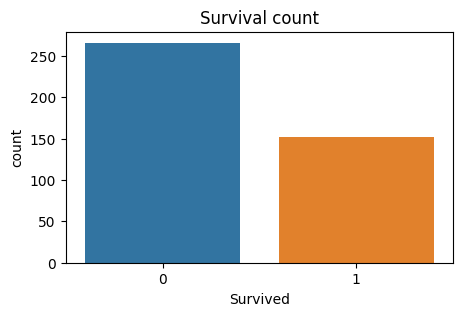

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=titanic_df, x='Survived')
plt.title('Survival count')
plt.show()

In [ ]:
px.histogram(titanic_df, x='Sex', title='Survival count of female and male passengers', color='Survived')


In [ ]:
px.histogram(titanic_df, x='Age',marginal='box' ,title='Age Count')

In [ ]:
px.histogram(titanic_df, x='Age',marginal='box' ,title='Age count by Survived', color='Survived')

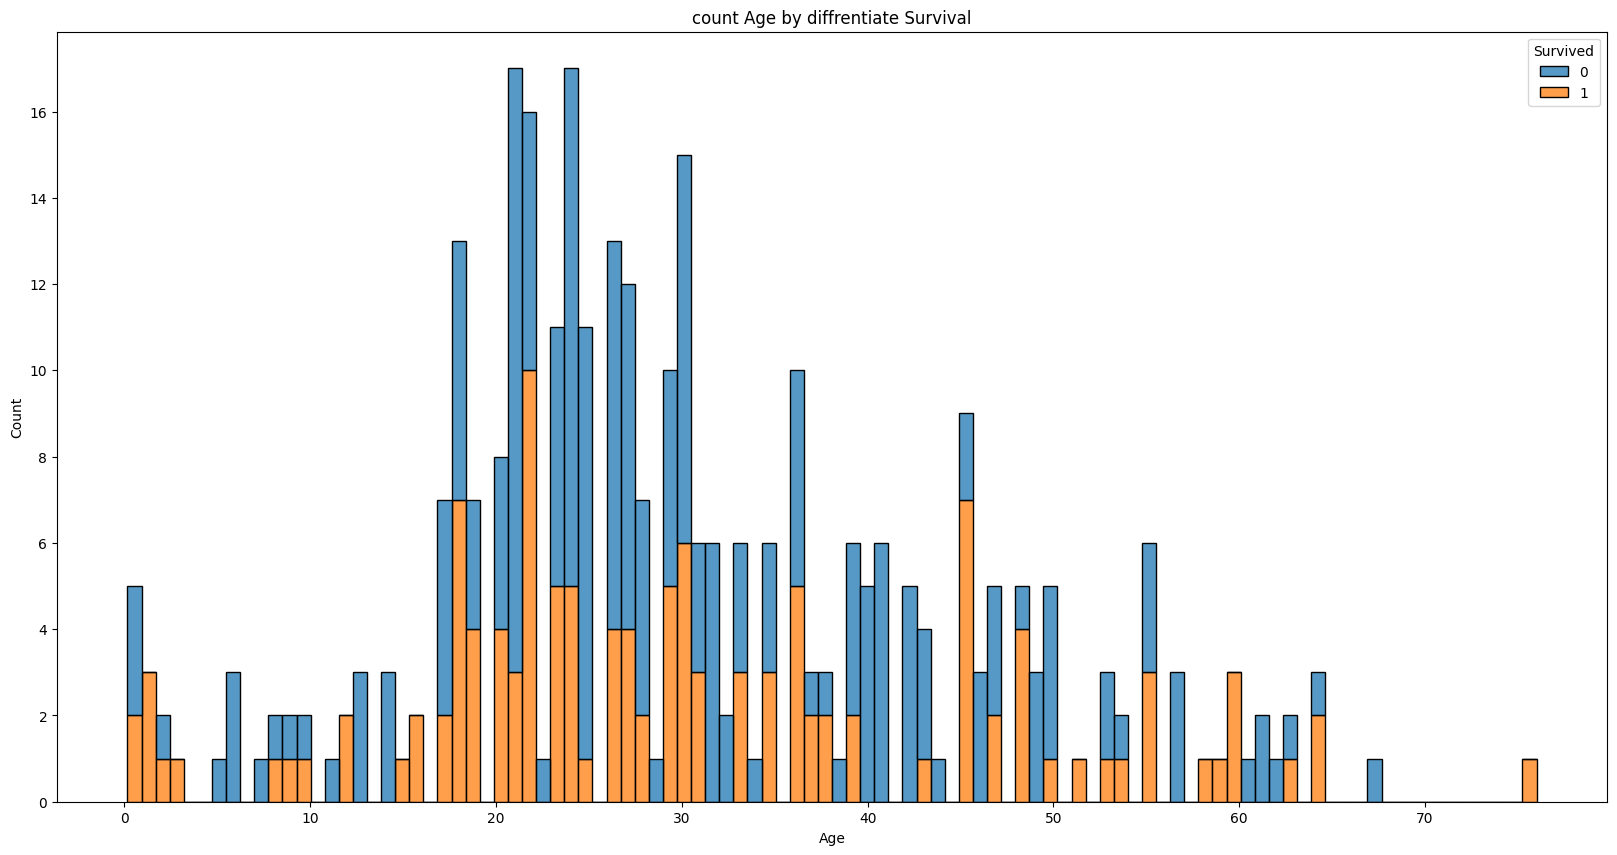

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=titanic_df, x='Age', hue='Survived', bins=100, multiple='stack', ax=ax)
plt.title('count Age by diffrentiate Survival')
plt.show()

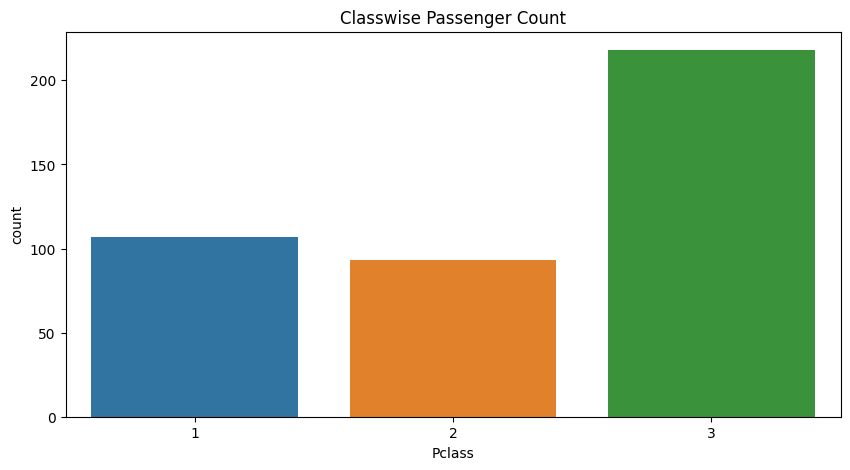

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=titanic_df, x='Pclass')
plt.title('Classwise Passenger Count')
plt.show()

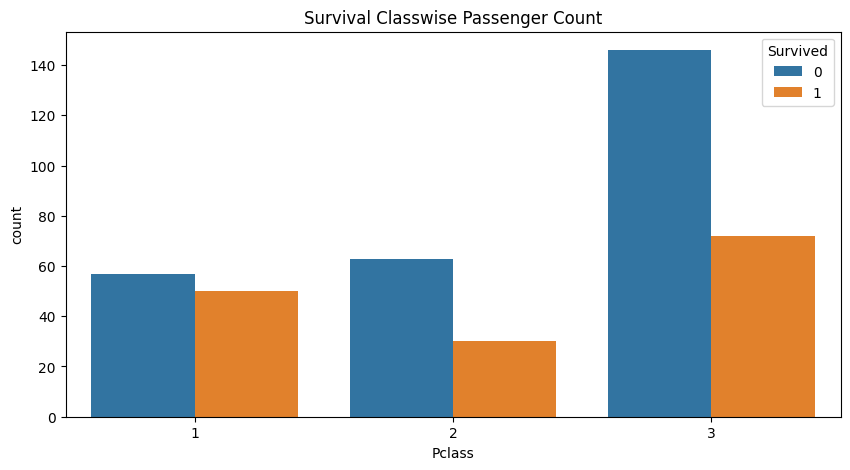

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title('Survival Classwise Passenger Count')
plt.show()

In [ ]:
px.histogram(titanic_df, x='Fare', title='Fare Survival Count', color='Survived')


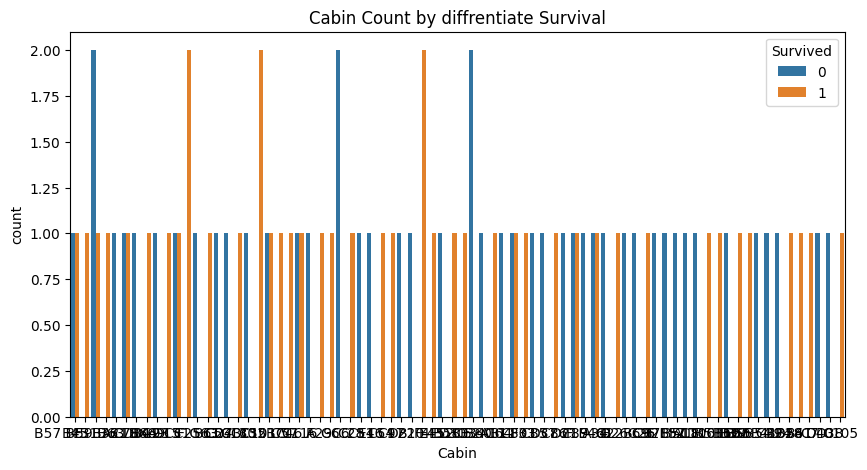

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=titanic_df, x='Cabin', hue='Survived')
plt.title('Cabin Count by diffrentiate Survival')
plt.show()

In [ ]:
px.pie(labels=titanic_df, values=titanic_df['Survived'].value_counts(), title='Survived Pie Chart')

#Data Cleaning

In [ ]:
titanic_df.isna().sum()

Age          86
Sex           0
Pclass        0
Fare          1
Cabin       327
Survived      0
dtype: int64

In [ ]:
# Filing nan valye with mean of values
titanic_df['Age'] = titanic_df['Age'].fillna(np.mean(titanic_df['Age']))
titanic_df['Fare'] = titanic_df['Fare'].fillna(np.mean(titanic_df['Fare']))
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(method='ffill')
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(method='bfill')

<ipython-input-22-3ad368e60406>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3ad368e60406>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3ad368e60406>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3ad368e

In [ ]:
titanic_df.isna().sum()

Age         0
Sex         0
Pclass      0
Fare        0
Cabin       0
Survived    0
dtype: int64

In [ ]:
titanic_df.duplicated().sum()

4

In [ ]:
titanic_df.drop_duplicates(inplace=True)

<ipython-input-25-c59069999fcb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Split The Data Into Inputs Data And Target Data

In [ ]:
inputs_data = titanic_df[titanic_df.columns[:-1]]
target = titanic_df['Survived']


#Split The Dataset Into Train And Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs_data, target, test_size=0.2, random_state=5)

#Sacling:


*  Scaling the numerical columns it means values of occure in range dont Effect of outliers



In [ ]:
numerical_col = x_train.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
x_train[numerical_col] = scaler.fit_transform(x_train[numerical_col])
x_test[numerical_col] = scaler.transform(x_test[numerical_col])

# One-Hot Encoding:

*   Convert the Categorical columns into numerical column because model word on numerical columns or we say that computer just work on numerical values




In [ ]:
categorical_col = x_train.select_dtypes(include='object').columns.tolist()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(x_train[categorical_col])
encod_col = list(encoder.get_feature_names_out(categorical_col))
x_train[encod_col] = encoder.transform(x_train[categorical_col])
x_test[encod_col] = encoder.transform(x_test[categorical_col])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
x_train = x_train[numerical_col + encod_col]
x_test = x_test[numerical_col + encod_col]
x_train.head()

,Age,Pclass,Fare,Sex_female,Sex_male,Cabin_A11,Cabin_A18,Cabin_A21,Cabin_A29,Cabin_A34,...,Cabin_E50,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6
254,0.140939,0.901358,-0.468000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,-0.768094,-0.282568,-0.404916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
312,-0.035130,0.901358,-0.502695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.180462,0.901358,-0.494134,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,-0.689048,0.901358,-0.499091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train the Model KNN Classifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3, p = 1)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

predict the Values

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

Heatmap show the Confusion metrix

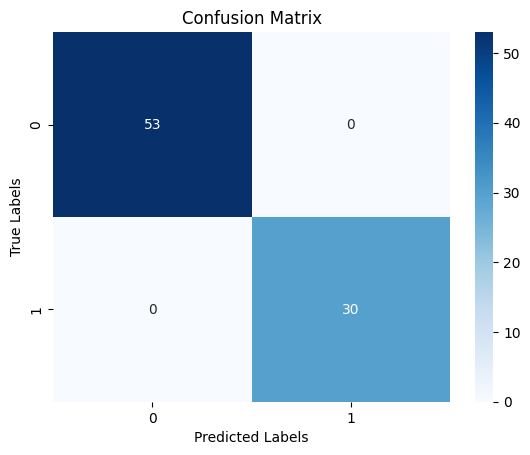

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

Accuracy Report

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        30

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



# Now Predict the Individual Input by using Helper function

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_col] = scaler.transform(input_df[numerical_col])
    input_df[encod_col] = encoder.transform(input_df[categorical_col])
    X_input = input_df[numerical_col + encod_col]
    pred = clf.predict(X_input)[0]
    return '{} ----> Survived'.format(pred) if pred==1 else '{} -----> Not Survived'.format(pred)

In [ ]:
new_input = {'Age': 44,
             'Sex': 'male',
             'Pclass': 3,
             'Fare': 7.00,
             'Cabin':'C105'
        }


In [ ]:
predict_input(new_input)

'0 -----> Not Survived'

In [ ]:
new_input = {'Age': 34,
             'Sex': 'female',
             'Pclass': 1,
             'Fare': 8.09,
             'Cabin':'C105'
  }

In [ ]:
predict_input(new_input)

'1 ----> Survived'